In [10]:
import pandas as pd
import numpy as np

In [6]:
import os
import numpy as np
from tqdm.notebook import tqdm
# Specify the directory path
directory_path = 'triples'

# List all files in the directory
l=[]
left=[]
x=0
files=os.listdir(directory_path)
for i in tqdm(range(len(files))):
    filename=files[i]
    # Create the full path for the file
    file_path = os.path.join(directory_path, filename)
    z=int(file_path.split('/')[-1].split("_")[1].strip(".txt"))
    if(z>2000):
        continue
    left.append(z)
    x+=1
    if os.path.isfile(file_path):
        with open(file_path, 'r',encoding='utf-8') as file:
            l.append(len(file.readlines()))

  0%|          | 0/3994 [00:00<?, ?it/s]

In [7]:
print(len(l))
x=set(left)
y=set(range(0,4000))
left=y-x
print(left)

2000
{1298, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165

In [8]:
l=np.array(l)
print("Mean: ",np.mean(l))
print("Median: ",np.median(l))
print("Max: ",np.max(l))
print("Min: ",np.min(l))


Mean:  20081.5795
Median:  8537.5
Max:  553210
Min:  0


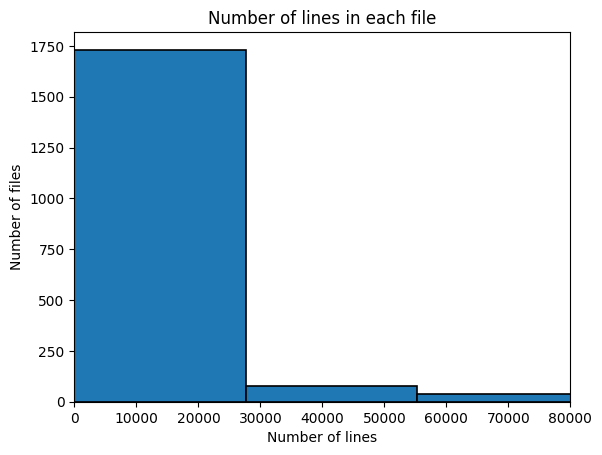

In [9]:
#plot histogram
import matplotlib.pyplot as plt
plt.hist(l, bins=20,edgecolor='black', linewidth=1.2)
plt.xlabel('Number of lines')
plt.ylabel('Number of files')
plt.title('Number of lines in each file')
plt.xlim(0, 80000)
plt.show()

In [30]:
data=pd.read_csv("test.csv")
data=data.iloc[0:2000]
complexity=data['complexityType'].unique()
d={}
for i in complexity:
    d[i]=0
for row in data.iterrows():
    try:
        with open("triples/question_"+str(row[0])+".txt", 'r',encoding='utf-8') as file:
            l=len(file.readlines())
            d[row[1]['complexityType']]+=l
    except:
        pass

In [31]:
print(d)

{'intersection': 5216513, 'count': 4627646, 'comparative': 7129752, 'yesno': 5838528, 'generic': 3952, 'ordinal': 3331861, 'multihop': 4217052, 'difference': 4801760, 'superlative': 4993043}


In [32]:
for i in d:
    d[i]=d[i]/2000
print(d)

{'intersection': 2608.2565, 'count': 2313.823, 'comparative': 3564.876, 'yesno': 2919.264, 'generic': 1.976, 'ordinal': 1665.9305, 'multihop': 2108.526, 'difference': 2400.88, 'superlative': 2496.5215}


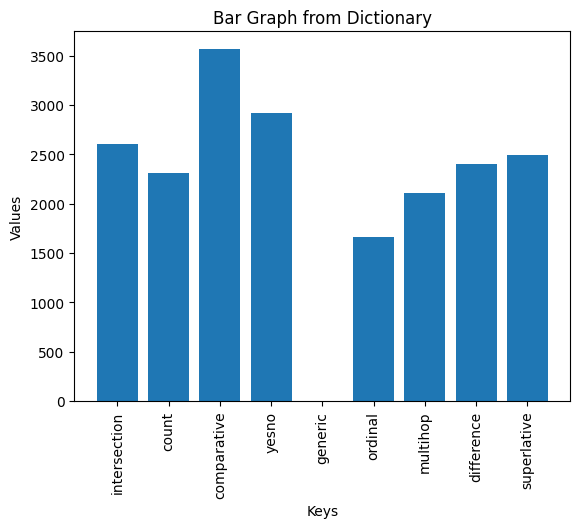

In [35]:
import matplotlib.pyplot as plt


# Extract keys and values from the dictionary
keys = list(d.keys())
values = list(d.values())

# Create bar graph
plt.bar(keys, values)

# Adding labels
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Bar Graph from Dictionary')
plt.xticks(rotation=90)
# Display the graph
plt.show()